In [11]:
import numpy as np
import pytraj as pt
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
import sys
import os
import gc
import collections
import copy
import ipywidgets as widgets
from ipywidgets import interact,interact_manual
from IPython.display import display
import tqdm

In [21]:
z_position=["-40","-39","-38","-37","-36","-35","-34","-33","-32",
    "-31","-30","-29","-28","-27","-26","-25","-24","-23",
    "-22","-21","-20","-19","-18","-17","-16","-15","-14",
    "-13","-12","-11","-10","-9","-8","-7","-6","-5","-4",
     "-3","-2","-1","0","1","2","3","4","5","6","7","8","9",
    "10","11","12","13","14","15","16","17","18","19","20",
    "21","22","23","24","25","26","27","28","29","30","31",
    "32","33","34","35","36","37","38","39","40"]
print np.shape(z_position)
cAMP=["-40.13","-34.32","-29.13","-22.96","-15.96","-8.79","0.48","7.30","16.46","22.05","30.21","37.67"]
print np.shape(cAMP)
cohenD=pd.read_table('cohenD_mat_wid03_42.txt',header=None,delim_whitespace=True)
print np.shape(cohenD)
print "Cohen's D score matrix:"
display(cohenD[0:3])
NonVot=pd.read_table('nonVot_radius.txt',header=None,delim_whitespace=True)
NonVot.columns=['Z','Radius','std']
display(NonVot[1:4])

cAMP_pos=pd.read_table('cAMP_position_radius.txt',header=None,delim_whitespace=True)
cAMP_pos.columns=['Z','Radius','std']


(81,)
(12,)
(12, 81)


,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,0.809627,1.624829,2.519536,1.924900,1.052728,0.275487,0.130583,0.283377,-0.121005,-1.190267,...,1.367261,0.795284,0.862217,1.238421,1.001058,1.789040,0.757029,0.618822,0.958565,0
1,0.330747,0.956683,0.728480,0.397444,0.131016,-0.403632,-0.039021,0.398497,0.121239,0.185193,...,2.288481,3.191933,2.236089,2.305144,2.349265,2.039673,1.868635,1.424536,1.697753,0
2,1.018230,2.846044,3.174845,3.838647,2.183281,2.566559,1.722927,1.722037,1.696492,1.406570,...,1.347585,0.776661,0.295542,0.053914,0.496449,0.341763,0.242699,0.604789,0.435646,0


,Z,Radius,std
1,-44.5,11.076,2.530
2,-43.5,13.079,5.115
3,-42.5,16.049,5.062


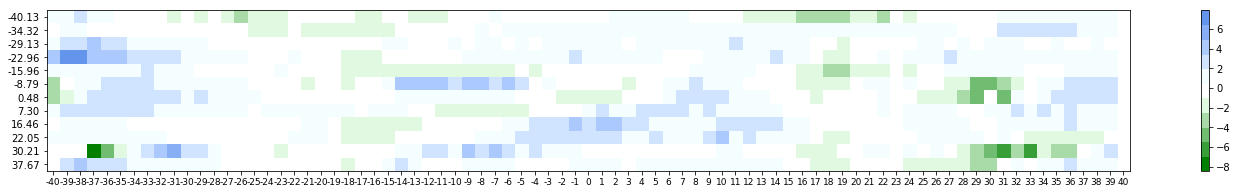

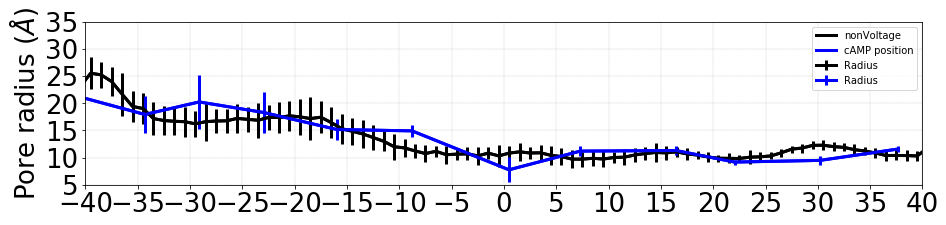

In [15]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

def custom_div_cmap(numcolors=11, name='custom_div_cmap',
                    mincol='blue', midcol='white', maxcol='red'):
    """ Create a custom diverging colormap with three colors
    Default is blue to white to red with 11 colors.  Colors can be specified
    in any way understandable by matplotlib.colors.ColorConverter.to_rgb()
    """
    from matplotlib.colors import LinearSegmentedColormap 
    cmap = LinearSegmentedColormap.from_list(name=name, 
                                             colors =[mincol, midcol, maxcol],
                                             N=numcolors)
    return cmap

custom_map = custom_div_cmap(11, mincol='g', midcol='1.1' ,maxcol='CornflowerBlue')
bwr_custom = custom_div_cmap(11)
bwr_custom = custom_map
fig,ax=plt.subplots(figsize=(20,2.8))
im = ax.imshow(cohenD,cmap=bwr_custom)
ax.set_xticks(np.arange(len(z_pisiton)))
ax.set_yticks(np.arange(len(cAMP)))
ax.set_xticklabels(z3)
ax.set_yticklabels(cAMP)
ax.tick_params(axis='x', colors='black',labelsize=9)
fig.tight_layout()
fig.colorbar(im,ax=ax)
plt.show()

fig,ax1=plt.subplots(figsize=(15,3))
ax1.plot(NonVot['Z'],NonVot['Radius'],alpha=1,label='nonVoltage',lw=3,color='black')
ax1.errorbar(NonVot['Z'], NonVot['Radius'],yerr=NonVot['std'],color="black",linewidth=3)
ax1.plot(cAMP_pos['Z'],cAMP_pos['Radius'],alpha=1,label='cAMP position',lw=3,color='blue')
ax1.errorbar(cAMP_pos['Z'], cAMP_pos['Radius'],yerr=cAMP_pos['std'],color="blue",linewidth=3)
ax1.set_ylabel(r"Pore radius ($\AA$)",color="black",fontsize=26)
ax1.set_xlim(-40,40)
ax1.set_ylim(5,30)
ax1.grid(True)
ax1.legend(loc="best")
ax1.tick_params(axis='x', colors='black',labelsize=26)
ax1.tick_params(axis='y', colors='black',labelsize=26)
ax1.tick_params(axis='y', which='minor', labelsize=26)
ax1.grid(color='grey',alpha=1,linestyle='dashed')
ax1.set_yticks(np.arange(5,40,5))
ax1.set_xticks(np.arange(-40,45,5))


plt.rc('grid', linestyle=":", color='black',linewidth='0.2')
plt.grid(True)
plt.show()